In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time
import matplotlib.pyplot as plt
import seaborn as sns
# Importing confusion_matrix 
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
url = 'sentiment_tweets3.csv'
dataset = pd.read_csv(url)

In [3]:
dataset.head(5)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
dataset.info

<bound method DataFrame.info of        Unnamed: 0                                            message  label
0             106  just had a real good moment. i missssssssss hi...      0
1             217         is reading manga  http://plurk.com/p/mzp1e      0
2             220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3             288  @lapcat Need to send 'em to my accountant tomo...      0
4             540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...           ...                                                ...    ...
10309      802309  No Depression by G Herbo is my mood from now o...      1
10310      802310  What do you do when depression succumbs the br...      1
10311      802311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312      802312  dont mistake a bad day with depression! everyo...      1
10313      802313                                                  0      1

[10314 rows x 3 columns]>

In [5]:
dataset.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [6]:
# Dropping column "unnamed"
dataset = dataset.drop('Unnamed: 0',axis=1)

In [7]:
dataset.head(5)

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [8]:
dataset.shape

(10314, 2)

In [9]:
# check non-depressive tweets
dataset[dataset["label"]==0].message.head()

0    just had a real good moment. i missssssssss hi...
1           is reading manga  http://plurk.com/p/mzp1e
2    @comeagainjen http://twitpic.com/2y2lx - http:...
3    @lapcat Need to send 'em to my accountant tomo...
4        ADD ME ON MYSPACE!!!  myspace.com/LookThunder
Name: message, dtype: object

In [10]:
# check depressive tweets
dataset[dataset["label"] == 1].message.head()

8000    The lack of this understanding is a small but ...
8001    i just told my parents about my depression and...
8002    depression is something i don't speak about ev...
8003    Made myself a tortilla filled with pb&j. My de...
8004    @WorldofOutlaws I am gonna need depression med...
Name: message, dtype: object

### Create a new column called "text length" which is the number of words in the text column.

In [11]:
dataset['text length'] = dataset['message'].apply(len)

In [12]:
dataset.head()

,message,label,text length
0,just had a real good moment. i missssssssss hi...,0,57
1,is reading manga http://plurk.com/p/mzp1e,0,42
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84
3,@lapcat Need to send 'em to my accountant tomo...,0,135
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45


In [13]:
dataset.describe()

,label,text length
count,10314.000000,10314.000000
mean,0.224355,92.626430
std,0.417177,64.662884
min,0.000000,1.000000
25%,0.000000,48.000000
50%,0.000000,78.000000
75%,0.000000,119.000000
max,1.000000,874.000000


## Visualizing Data

#### Create a countplot of the number of occurrences for each type label.

Text(0.5, 1.0, 'Dataset distribution')

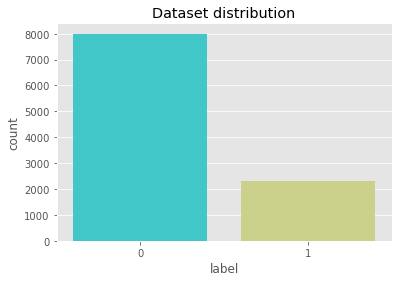

In [261]:
ax = sns.countplot(x="label", data=dataset,palette='rainbow')
ax.set_title('Dataset distribution')

Here 0 represents "depressive message" and 1 represents "non-depressive message"

#### Use FacetGrid from the seaborn library to create a grid of 2 histograms of text length based off of the labels.

Text(0.5, 1.05, 'Text length distribution in each label')

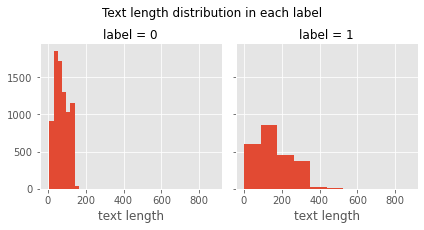

In [271]:
g = sns.FacetGrid(dataset,col='label')
g.map(plt.hist,'text length')
g.fig.suptitle("Text length distribution in each label", y = 1.05)

#### Create a boxplot of text length for each category.

Text(0.5, 1.0, 'Boxplot of text length for each category')

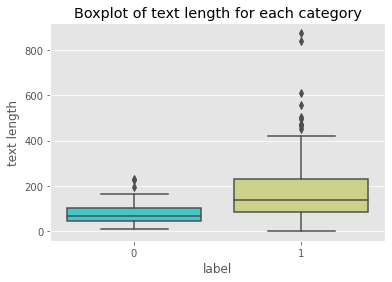

In [274]:
ax = sns.boxplot(x='label',y='text length',data=dataset,palette='rainbow')
ax.set_title('Boxplot of text length for each category')

### CLEANING DATA

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GARGI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
corpus = []
for i in range(0,10314):
    tweet = dataset['message'][i]
    tweet = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', ' ', tweet) # remove urls
    tweet = re.sub(r'#', '', tweet) # remove hashtag symbol
    tweet = re.sub(r'<([^>]*)>', ' ', tweet) # remove emojis
    tweet = re.sub('[^a-zA-Z]',' ', tweet) 
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [19]:
corpus[:50]

['real good moment missssssssss much',
 'read manga',
 'comeagainjen',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund',
 'sleepi good time tonight though',
 'silkcharm nbn someon alreadi said fiber home mean least regular',
 'c possibl today nice',
 'nite twittervil workout ciao',
 'danann night darlin sweet dream',
 'good morn everybodi',
 'final creat wordpress blog alreadi blog seattl coffe commun',
 'kisha cnt get u til get frm u rememb ur top',
 'nicolerichi ye rememb band awesom pleas repli',
 'realli love reflect shadow',
 'blueaero ooo fantasi like fantasi novel check',
 'rokchic prob sell noth blog get listen band itun',
 'shipovalov quot nokla connect peopl quot',
 'stay late start earli good thing like job',
 'kal penn read new job congratul fantast',
 'abl sleep think watch ugli betti onlin',
 'woo thank ron steev follow yeow folowerssss haha p wanna got ellen show',
 'aidenchan yeah sure sister take extra

In [20]:
# Creating dataframe of cleaned data
df = pd.DataFrame({'message':corpus, 'label':dataset['label']})
df.head(),df.tail()

(                                             message  label
 0                 real good moment missssssssss much      0
 1                                         read manga      0
 2                                       comeagainjen      0
 3  lapcat need send em account tomorrow oddli eve...      0
 4                    add myspac myspac com lookthund      0,
                                                  message  label
 10309      depress g herbo mood done stress peopl deserv      1
 10310  depress succumb brain make feel like never enough      1
 10311  ketamin nasal spray show promis depress suicid...      1
 10312             dont mistak bad day depress everyon em      1
 10313                                                         1)

## Word cloud visualization of Dataset

In [21]:
from wordcloud import WordCloud

For depression indicative texts

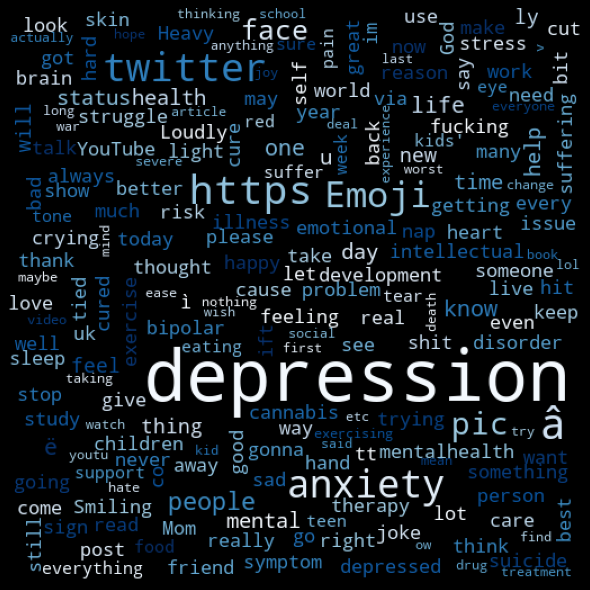

In [22]:
depressive_words = ' '.join(list(dataset[dataset['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

For non-depression indicative texts

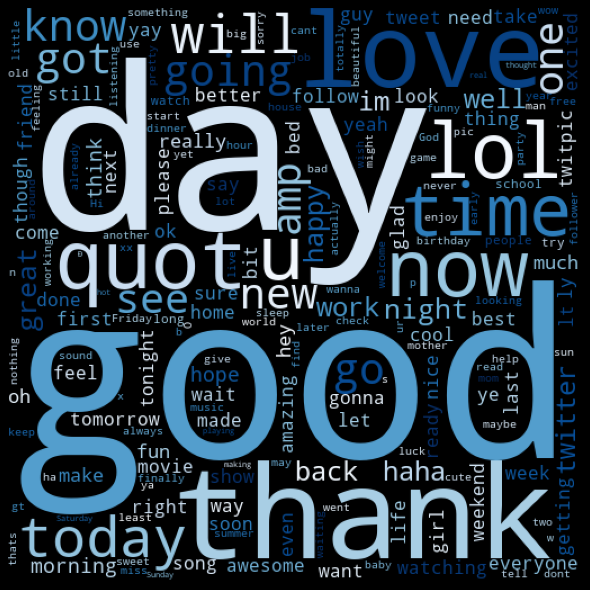

In [23]:
positive_words = ' '.join(list(dataset[dataset['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

# Machine Learning Classification Models

Defining class for all the traditional machine learning classifiers:
1. Naive Bayes
2. K Nearest Neighbours
3. Decision Tree 
4. Random Forest
5. Support Vector Machine
6. Kernal Support Vector Machine

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

class Classifier:
    
    def __init__(self, X_train, y_train, classifier_name, n_neighbors = 1):
        self.X_train = X_train
        self.y_train = y_train
        # For naive bayes 
        if classifier_name == 'NB':
            self.classifier = GaussianNB()
        
        # For K-nearest neighbours
        if classifier_name == 'KNN':
            self.classifier = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'minkowski', p = 2)
        
        # For Decision tree
        if classifier_name == 'DTree':
            self.classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        
        # For Random Forest
        if classifier_name == 'RF':
            self.classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
            
        # For SVM
        if classifier_name == 'SVM':
            self.classifier = SVC(kernel = 'linear', random_state = 0)
            
        # For Kernel SVM 
        if classifier_name == 'KSVM':
            self.classifier = SVC(kernel = 'rbf', random_state = 0)
            
            
        self.classifier.fit(X_train,y_train)
        
    def predict(self, X_test):
        self.y_pred = self.classifier.predict(X_test)
        return self.y_pred
    
    def cf_matrix(self, y_test):
        self.cf = confusion_matrix(y_test, self.y_pred)
        return self.cf

Note: use classication names as:
1. Naive Bayes = 'NB'
2. Decision Tree = 'DTree'
3. Random Forest = 'RF'
4. K Nearest Neighbours = 'KNN'
5. SVM = 'SVM'
6. Kernal SVM = 'KSVM'

### STORING RESULTS

For every feature engineering, we will store result of every classification model.

In [129]:
features = ['bow', 'tfidf', 'word2vec', 'gloVe']
models = ['Naive Bayes', 'Decision Tree', 'KNN', 'Random Forest', 'SVM', 'Kernel SVM']
d_accuracy = {}
d_precision = {}
d_recall = {}
d_fscore = {}

for feature in features:
    d_accuracy[feature] = {}
    for model in models:
        d_accuracy[feature][model] = 0

for feature in features:
    d_precision[feature] = {}
    for model in models:
        d_precision[feature][model] = 0

for feature in features:
    d_recall[feature] = {}
    for model in models:
        d_recall[feature][model] = 0
        
for feature in features:
    d_fscore[feature] = {}
    for model in models:
        d_fscore[feature][model] = 0

def store_result(metrics, feature_name, model):
    precision, recall, Fscore, accuracy = metrics
    d_accuracy[feature_name][model] = accuracy
    d_precision[feature_name][model] = precision
    d_fscore[feature_name][model] = Fscore
    d_recall[feature_name][model] = recall


### PREDICTION ANALYSIS

In [143]:
# Function for calculation of evalution matrix
def metrics(labels, predictions, feature_name, model_name):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = (true_pos / (true_pos + false_pos))*100
    precision = round(precision, 2)
    recall = (true_pos / (true_pos + false_neg))*100
    recall = round(recall, 2)
    Fscore = (2 * precision * recall / (precision + recall))
    Fscore = round(Fscore,2)
    accuracy = ((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg))*100
    accuracy = round(accuracy,2)
    
    # Store result
    store_result((precision, recall, Fscore, accuracy), feature_name, model_name)
    
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [144]:
# Function for plotting confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

### SPLITTING DATASET

In [145]:
from sklearn.model_selection import train_test_split

# Function for splitting dataset into training and testing dataset
def split_dataset(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0) 
    return (X_train, X_test, y_train, y_test)

# NLP Classification Task

### CREATING BAG OF WORDS

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
cv = CountVectorizer(max_features=400) #18153
X = cv.fit_transform(corpus).toarray()
y = dataset['label']

In [148]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [149]:
X.shape

(10314, 400)

In [150]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64

In [151]:
# Splitting dataset
X_train, X_test, y_train, y_test = split_dataset(X,y)

# Implementing classification models

### Naive Bayes 

In [152]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'NB')
# Predicting y values
y_pred = classifier.predict(X_test)

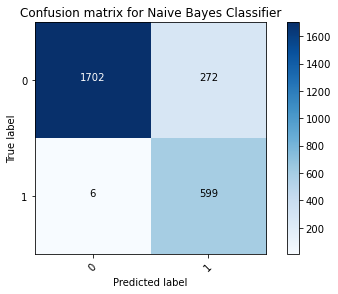

In [153]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Naive Bayes Classifier')

In [154]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'Naive Bayes')

Precision:  68.77
Recall:  99.01
F-score:  81.16
Accuracy:  89.22


### DECISION TREE CLASSIFIER

In [158]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'DTree')
# Predicting y values
y_pred = classifier.predict(X_test)

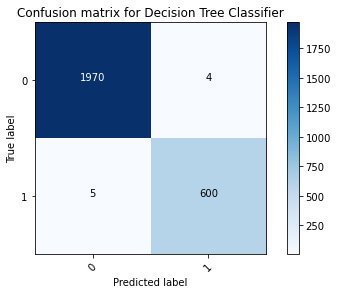

In [159]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Decision Tree Classifier')

In [160]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'Decision Tree')

Precision:  99.34
Recall:  99.17
F-score:  99.25
Accuracy:  99.65


### K-NEAREST NEIGHBOUR CLASSIFIER

#### Create a KNN model instance with n_neighbors=1

In [162]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KNN')
# Predicting y values
y_pred = classifier.predict(X_test)

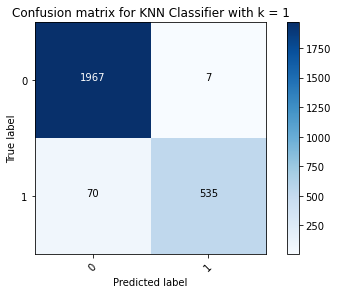

In [163]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KNN Classifier with k = 1')

In [164]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'KNN')

Precision:  98.71
Recall:  88.43
F-score:  93.29
Accuracy:  97.01


#### Choosing K - value using elbow method

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list

In [67]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error Rate')

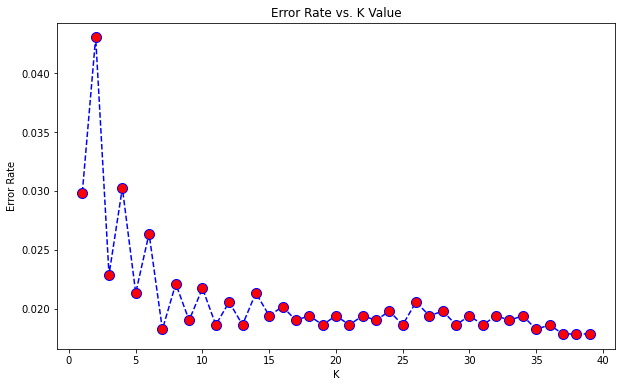

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Retrain with new K value (K = 38)

In [165]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KNN', n_neighbors=38)
# Predicting y values
y_pred = classifier.predict(X_test)

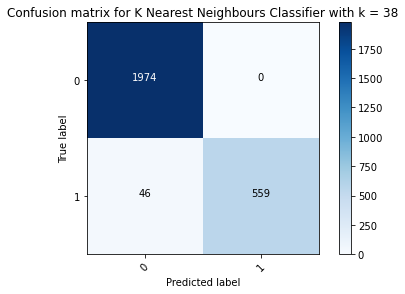

In [74]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for K Nearest Neighbours Classifier with k = 38')

In [166]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'KNN')

Precision:  100.0
Recall:  92.4
F-score:  96.05
Accuracy:  98.22


### RANDOM FOREST CLASSIFIER

In [167]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'RF')
# Predicting y values
y_pred = classifier.predict(X_test)

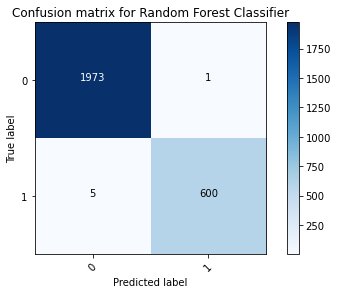

In [168]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Random Forest Classifier')

In [169]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'Random Forest')

Precision:  99.83
Recall:  99.17
F-score:  99.5
Accuracy:  99.77


### SVM CLASSIFIER

In [170]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'SVM')
# Predicting y values
y_pred = classifier.predict(X_test)

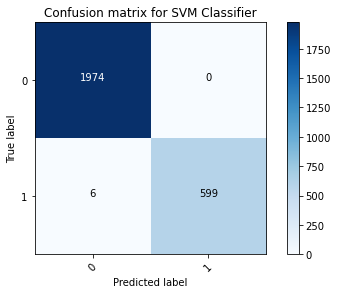

In [171]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for SVM Classifier')

In [173]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'SVM')

Precision:  100.0
Recall:  99.01
F-score:  99.5
Accuracy:  99.77


### KERNEL SVM CLASSIFIER

In [174]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KSVM')
# Predicting y values
y_pred = classifier.predict(X_test)

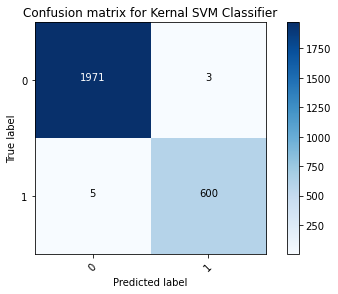

In [175]:
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Kernal SVM Classifier')

In [176]:
# Evalutation matrix
metrics(list(y_test),y_pred, 'bow', 'Kernel SVM')

Precision:  99.5
Recall:  99.17
F-score:  99.33
Accuracy:  99.69


# Using Text Classifier - TF-IDF

In [192]:
cv = CountVectorizer(max_features=600) #18153
X = cv.fit_transform(corpus).toarray() 

In [193]:
from sklearn.feature_extraction.text import TfidfTransformer

X_tfidf = TfidfTransformer().fit_transform(X).toarray()

In [194]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64

## Splitting dataset

In [196]:
X_train, X_test, y_train, y_test = split_dataset(X_tfidf, y) 

## Implement Classification Models

### Naive Bayes

Precision:  44.45
Recall:  98.68
F-score:  61.29
Accuracy:  70.76


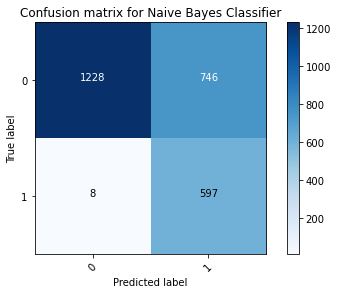

In [197]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'NB')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Naive Bayes Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'tfidf', 'Naive Bayes')

### Random Forest

Precision:  100.0
Recall:  99.01
F-score:  99.5
Accuracy:  99.77


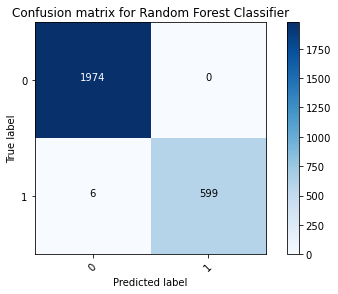

In [198]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'RF')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Random Forest Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'tfidf', 'Random Forest')

 ### Decision Tree

Precision:  99.5
Recall:  99.01
F-score:  99.25
Accuracy:  99.65


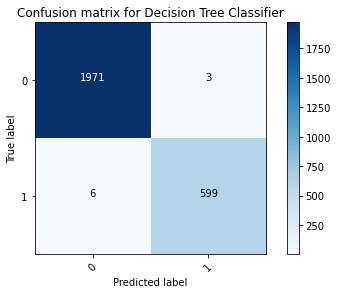

In [199]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'DTree')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Decision Tree Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'tfidf', 'Decision Tree')

### KNN

Precision:  81.77
Recall:  48.93
F-score:  61.22
Accuracy:  85.46


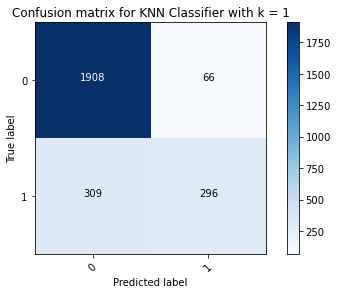

In [200]:
# Create a KNN model instance with n_neighbors=1
# Creating classifier object
classifier = Classifier(X_train,y_train,'KNN', n_neighbors=1)
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KNN Classifier with k = 1')
# Evalutation matrix
metrics(list(y_test),y_pred, 'tfidf', 'KNN')

### SVM

Precision:  100.0
Recall:  99.01
F-score:  99.5
Accuracy:  99.77


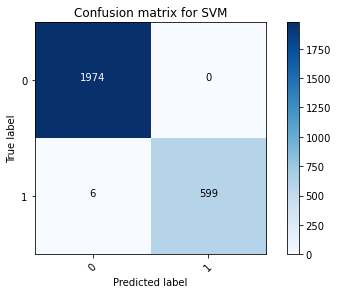

In [201]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'SVM')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for SVM')
# Evalutation matrix
metrics(list(y_test),y_pred, 'tfidf', 'SVM')

### Kernel SVM

Precision:  100.0
Recall:  99.01
F-score:  99.5
Accuracy:  99.77


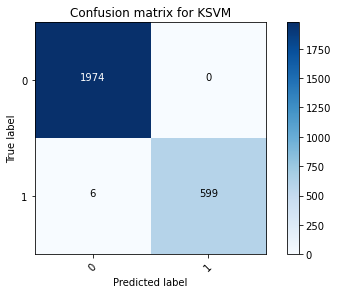

In [202]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KSVM')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KSVM')
# Evalutation matrix
metrics(list(y_test),y_pred,'tfidf', 'Kernel SVM')

# Word Embedding

## Word2Vec

In [102]:
from gensim.models import KeyedVectors

class Word2VecVectorizer:
    def __init__(self):
        print("Loading in word vectors...")
        self.word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)
        print("Finished loading in word vectors")

    def fit(self, data):
        pass

    def transform(self, data):
        # determine the dimensionality of vectors
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    # throws KeyError if word not found
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X


    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

## Vectorizer initialization

In [104]:
vectorizer_w2v = Word2VecVectorizer()

Loading in word vectors...
Finished loading in word vectors


In [203]:
# Processing dataset using vectorizer_w2v
X_w2v = vectorizer_w2v.fit_transform(corpus)
y_w2v = dataset['label']

Numer of samples with no words found: 126 / 10314


### Splitting dataset

In [204]:
X_train, X_test, y_train, y_test = split_dataset(X_w2v, y_w2v)

## Implementing classification models

### Naive Bayes

Precision:  73.83
Recall:  96.53
F-score:  83.67
Accuracy:  91.16


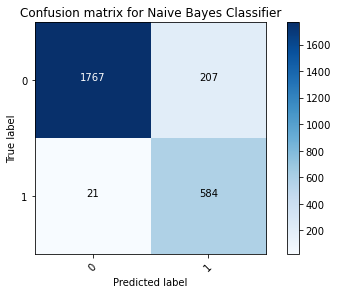

In [205]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'NB')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Naive Bayes Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'word2vec', 'Naive Bayes')

### Decision Tree

Precision:  82.35
Recall:  83.31
F-score:  82.83
Accuracy:  91.9


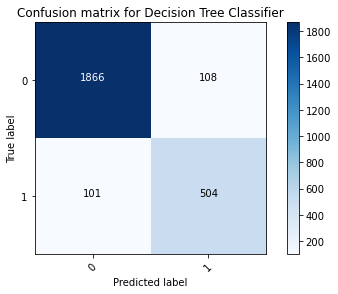

In [206]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'DTree')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Decision Tree Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'word2vec', 'Decision Tree')

### KNN

Precision:  62.25
Recall:  98.68
F-score:  76.34
Accuracy:  85.65


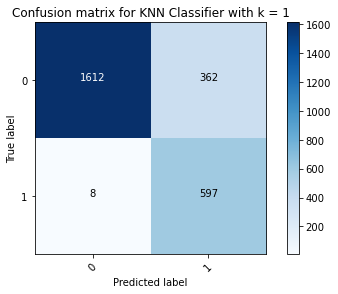

In [207]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KNN', n_neighbors=1)
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KNN Classifier with k = 1')
# Evalutation matrix
metrics(list(y_test),y_pred, 'word2vec', 'KNN')

### Random Forest

Precision:  99.6
Recall:  82.81
F-score:  90.43
Accuracy:  95.89


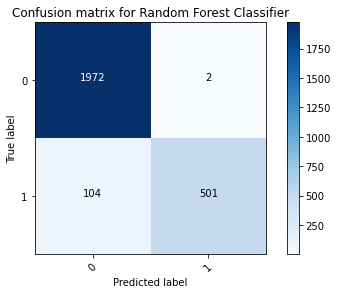

In [208]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'RF')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating classifier object
classifier = Classifier(X_train,y_train,'RF')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Random Forest Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'word2vec', 'Random Forest')

### SVM

Precision:  94.95
Recall:  96.36
F-score:  95.65
Accuracy:  97.94


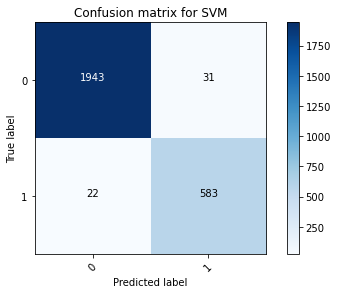

In [209]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'SVM')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for SVM')
# Evalutation matrix
metrics(list(y_test),y_pred, 'word2vec', 'SVM')

### KSVM

Precision:  99.33
Recall:  97.52
F-score:  98.42
Accuracy:  99.26


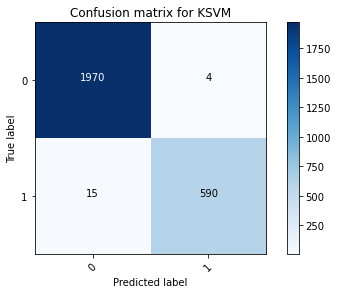

In [210]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KSVM')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KSVM')
# Evalutation matrix
metrics(list(y_test),y_pred, 'word2vec', 'Kernel SVM')

## GloVe 

In [114]:
class GloveVectorizer:
    def __init__(self):
        # load in pre-trained word vectors
        print('Loading word vectors...')
        word2vec = {}
        embedding = []
        idx2word = []
        glove_file = open('glove.6B.50d.txt', encoding="utf8")

        # is just a space-separated text file in the format:
        # word vec[0] vec[1] vec[2] ...
        for line in glove_file:
            values = line.split()
            word = values[0]
            vec = np.asarray(values[1:], dtype='float32')
            word2vec[word] = vec
            embedding.append(vec)
            idx2word.append(word)
        glove_file.close()
        print('Found %s word vectors.' % len(word2vec))

        # save for later
        self.word2vec = word2vec
        self.embedding = np.array(embedding)
        self.word2idx = {v:k for k,v in enumerate(idx2word)}
        self.V, self.D = self.embedding.shape

    def fit(self, data):
        pass

    def transform(self, data):
        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.lower().split()
            vecs = []
            for word in tokens:
                if word in self.word2vec:
                    vec = self.word2vec[word]
                    vecs.append(vec)
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

### Vectorizer initialization

In [115]:
vectorizer_gv = GloveVectorizer()

Loading word vectors...
Found 400000 word vectors.


In [116]:
# Processing dataset using vectorizer_w2v
X_gv = vectorizer_gv.fit_transform(corpus)
y_gv = dataset['label']

Numer of samples with no words found: 131 / 10314


### Splitting dataset

In [211]:
X_train, X_test, y_train, y_test = split_dataset(X_gv, y_gv)

## Implementing classification models

### Naive Bayes

Precision:  75.13
Recall:  92.89
F-score:  83.07
Accuracy:  91.12


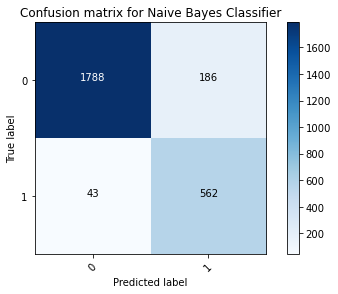

In [212]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'NB')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Naive Bayes Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'gloVe', 'Naive Bayes')

### Decision Tree

Precision:  72.0
Recall:  74.38
F-score:  73.17
Accuracy:  87.2


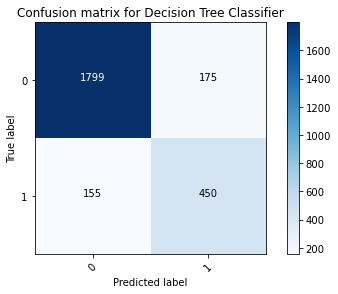

In [213]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'DTree')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Decision Tree Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'gloVe', 'Decision Tree')

### KNN

Precision:  65.75
Recall:  94.55
F-score:  77.56
Accuracy:  87.17


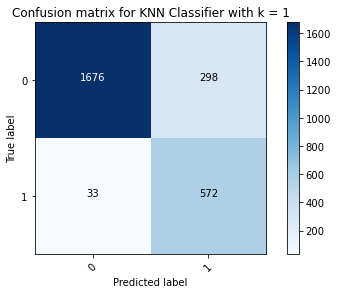

In [214]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KNN', n_neighbors=1)
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KNN Classifier with k = 1')
# Evalutation matrix
metrics(list(y_test),y_pred, 'gloVe', 'KNN')

### Random Forest

Precision:  95.12
Recall:  74.05
F-score:  83.27
Accuracy:  93.02


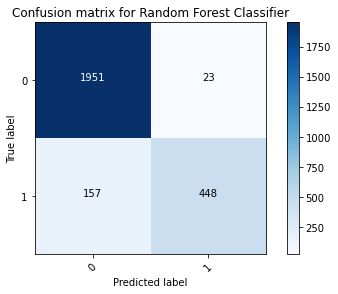

In [215]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'RF')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating classifier object
classifier = Classifier(X_train,y_train,'RF')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for Random Forest Classifier')
# Evalutation matrix
metrics(list(y_test),y_pred, 'gloVe', 'Random Forest')

### SVM

Precision:  85.74
Recall:  82.48
F-score:  84.08
Accuracy:  92.67


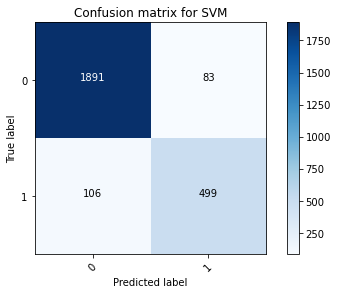

In [217]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'SVM')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for SVM')
# Evalutation matrix
metrics(list(y_test),y_pred, 'gloVe', 'SVM')

### Kernal SVM

Precision:  93.72
Recall:  91.24
F-score:  92.46
Accuracy:  96.51


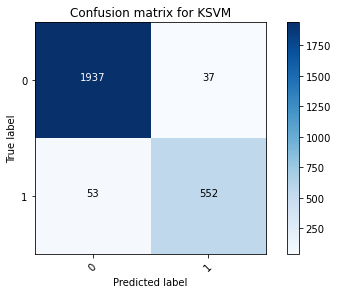

In [218]:
# Creating classifier object
classifier = Classifier(X_train,y_train,'KSVM')
# Predicting y values
y_pred = classifier.predict(X_test)
# Creating and plotting confusion_matrix 
cf_matrix = classifier.cf_matrix(y_test)
plot_confusion_matrix(cf_matrix,classes=[0,1],title='Confusion matrix for KSVM')
# Evalutation matrix
metrics(list(y_test),y_pred, 'gloVe', 'Kernel SVM')

# Visualizing Result

In [248]:
plt.style.use('ggplot')

                 bow  tfidf  word2vec  gloVe
Naive Bayes    89.22  70.76     91.16  91.12
Decision Tree  99.65  99.65     91.90  87.20
KNN            98.22  85.46     85.65  87.17
Random Forest  99.77  99.77     95.89  93.02
SVM            99.77  99.77     97.94  92.67
Kernel SVM     99.69  99.77     99.26  96.51


Text(0.5, 0, 'Features')

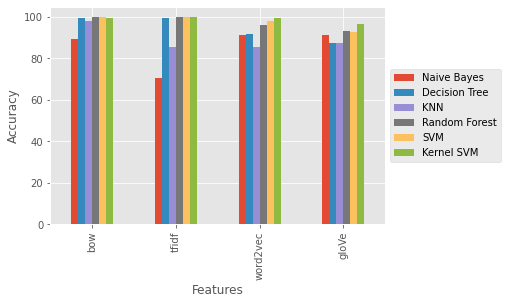

In [243]:
df_accuracy = pd.DataFrame(d_accuracy)
print(df_accuracy)

df_accuracy.transpose().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Accuracy')
plt.xlabel('Features')
plt.text()
addlabels()

                 bow  tfidf  word2vec  gloVe
Naive Bayes    89.22  70.76     91.16  91.12
Decision Tree  99.65  99.65     91.90  87.20
KNN            98.22  85.46     85.65  87.17
Random Forest  99.77  99.77     95.89  93.02
SVM            99.77  99.77     97.94  92.67
Kernel SVM     99.69  99.77     99.26  96.51


Text(0.5, 0, 'Features')

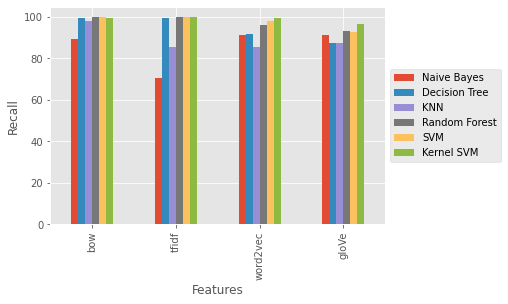

In [244]:
df_recall = pd.DataFrame(d_accuracy)
print(df_recall)

df_recall.transpose().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Recall')
plt.xlabel('Features')

                 bow  tfidf  word2vec  gloVe
Naive Bayes    89.22  70.76     91.16  91.12
Decision Tree  99.65  99.65     91.90  87.20
KNN            98.22  85.46     85.65  87.17
Random Forest  99.77  99.77     95.89  93.02
SVM            99.77  99.77     97.94  92.67
Kernel SVM     99.69  99.77     99.26  96.51


Text(0.5, 0, 'Features')

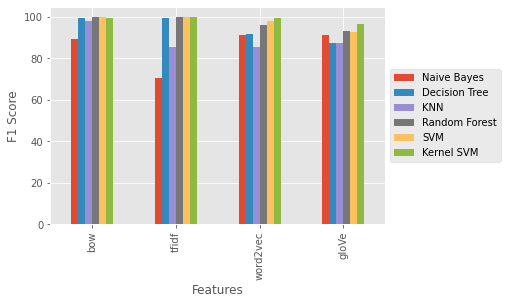

In [257]:
df_fscore = pd.DataFrame(d_accuracy)
print(df_fscore)

df_fscore.transpose().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('F1 Score')
plt.xlabel('Features')

                 bow  tfidf  word2vec  gloVe
Naive Bayes    89.22  70.76     91.16  91.12
Decision Tree  99.65  99.65     91.90  87.20
KNN            98.22  85.46     85.65  87.17
Random Forest  99.77  99.77     95.89  93.02
SVM            99.77  99.77     97.94  92.67
Kernel SVM     99.69  99.77     99.26  96.51


Text(0.5, 0, 'Features')

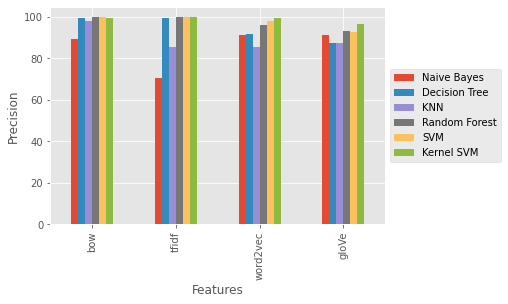

In [259]:
df_precision = pd.DataFrame(d_accuracy)
print(df_precision)

df_precision.transpose().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Precision')
plt.xlabel('Features')
